<div align="center">
    <a href="https://colab.research.google.com/github/z-a-f/PyTorch-Notebooks/blob/master/00-Primer/PyTorch/01-Basics.ipynb" style="text-align:center">Open in Colab
        <img src="https://colab.research.google.com/img/colab_favicon.ico" width=64/>
    </a>
</div>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Introduction To PyTorch

`PyTorch` is a deep learning framework, but you probably know it already.
In this section you will learn:

1. What is the package structure of PyTorch
1. Basic data structures in PyTorch
1. How to manipulate PyTorch tensors
1. How to make use of the GPU's (if available)

This is just a very basic info, and you can find many more tutorials in the [PyTorch Hub](https://pytorch.org/tutorials).

## 1. What is the PyTorch Package?

Once you [install](https://pytorch.org/get-started/locally/#mac-installation) PyTorch, it is useful to know where different tools are located.
The most comprehensive is to look in the [documentation](https://pytorch.org/docs/stable/index.html), but here is the gist:

- `torch` -- Location for the basic PyTorch utilities, such as `torch.empty` (creates an empty tensor) or `torch.sum` (sums the elements in a tensor).
- `torch.nn` -- Location for the deep learning utilities. You can find all the computational layers here.
- `torch.nn.functional` -- Also the deep learning utilities, with the exception that most of the utilities here are "stateless". Hopefully more on it later.

There are many more, but for now we will only work with these three.
Let's import these three:

In [2]:
import torch
from torch import nn
from torch.nn import functional as F

## 2. Data Manipulation in PyTorch

### Creating Tensors

A tensor is the main data structure in PyTorch and it has a type `torch.Tensor`.
Tensors are defined by several key attributes shown in the table below (`a` represents a valid tensor object).

|Attribute | `PyTorch` | `numpy`<br>equivalent | Description |
|:---------|:---------:|:------------------:|:------------|
| Rank     | `a.dim()` | `a.ndim`<br>`np.ndim(a)`| Number of axes in the tensor `T`|
| Shape    | `a.shape` | `a.shape`<br>`np.shape(a)` |Number of dimensions along each axis in T |
| Data Type| `a.dtype` | `a.dtype` | The type of the data stored in the tensor |

PyTorch tensor can be created simply using **`torch.Tensor`**:

```python
>>> torch.Tensor(2)  # Creates a tensor with 2 elements
tensor([-2.8131e-36,  3.0872e-41])
>>> torch.Tensor([2])  # Creates a tensor with a single element (2)
tensor([2.])
```

By convention we have specific names for a tensor depending on its properties:

- A tensor of rank 0 is called a **Scalar**.
```python
>>> a = torch.Tensor([3])[0]  # Create a single element, and get it
>>> a.ndim
0
>>> a
tensor(3.)  # <- This is a Scalar
```
- A tensor of rank 1 is commonly refered to as **Vector**
```python
>>> a = torch.Tensor([3])  # Create a single element tensor
>>> a.ndim
1
>>> a
tensor([3.])  # <- This is a vector
```
- A tensor of rank 2 is commonly refered to as **Matrix**
```python
>>> a = torch.Tensor([[3]])  # Create a single element tensor
>>> a.ndim
2
>>> a
tensor([[3.]])  # <- This is a matrix
```

There are other ways of creating a tensor, for example **`torch.empty`**, which takes the shape and the dtype of the tensor to be created:

In [3]:
a = torch.empty((2, 3, 4), dtype=torch.float)
print(f'The shape of a is {a.shape}')
print(f'The rank of a is {a.ndim}')
print(f'a has a dtype of {a.dtype}')

The shape of a is torch.Size([2, 3, 4])
The rank of a is 3
a has a dtype of torch.float32


Another useful way of creating a tensor is **`torch.from_numpy`** or **`torch.as_tensor`**, which take a numpy array, and convert it to PyTorch tensor:

In [4]:
a_np = np.arange(27).reshape(3, 3, 3)
print(f'NumPy array has a shape of {a_np.shape} and a dtype of {a_np.dtype}')
a_torch = torch.from_numpy(a_np)
print(f'PyTorch array has a shape of {a_torch.shape} and a dtype of {a_torch.dtype}')

NumPy array has a shape of (3, 3, 3) and a dtype of int64
PyTorch array has a shape of torch.Size([3, 3, 3]) and a dtype of torch.int64


*Note:* You can convert any PyTorch tensor into NumPy using `a.numpy()`

If you want to create "filled" data structures, here is an incomplete list:

- **`torch.randn`** fills with values that are normally distributed around zero;
- **`torch.rand`** fills with values that are uniformally distributed in the range \[0, 1\];
- **`torch.zeros`**/**`torch.ones`** fills the tensor with zeros/ones;
- **`torch.eye`** creates an identity matrix
- **`torch.arange`** creates a range of values in a preset interval and step size;
- **`torch.linspace`** creates a range of values in a preset interval and number of points (step size is computed automatically);

In [5]:
print(f'>>> torch.randn(4)\n{torch.randn(4)}')
print(f'>>> torch.rand(4)\n{torch.rand(4)}')
print(f'>>> torch.zeros(4)\n{torch.zeros(4)}')
print(f'>>> torch.ones(4)\n{torch.ones(4)}')
print(f'>>> torch.eye(4)\n{torch.eye(4)}')
print(f'>>> torch.arange(0, 10, 4)\n{torch.arange(0, 10, 4)}')
print(f'>>> torch.linspace(0, 10, 4)\n{torch.linspace(0, 10, 4)}')

>>> torch.randn(4)
tensor([-0.1071, -0.6183, -0.0295,  0.8215])
>>> torch.rand(4)
tensor([0.3090, 0.3346, 0.0147, 0.7158])
>>> torch.zeros(4)
tensor([0., 0., 0., 0.])
>>> torch.ones(4)
tensor([1., 1., 1., 1.])
>>> torch.eye(4)
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
>>> torch.arange(0, 10, 4)
tensor([0, 4, 8])
>>> torch.linspace(0, 10, 4)
tensor([ 0.0000,  3.3333,  6.6667, 10.0000])


### Checkpoint Assignment

Create a PyTorch tensor of rank 2 such that its dtype would be `torch.uint8` and the shape `(16, 16)` of all zeroes.
Set the values to be in increasing order, such that the first row would have [0, 1, ..., 15], the second row would be [16, 17, ..., 31] etc.

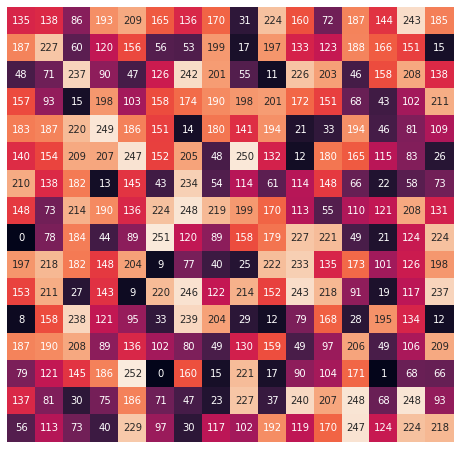

In [6]:
def make_square_tensor1():
    # TODO: Finish this part
    result = (torch.rand(16, 16) * 256).to(torch.uint8)  # This is a placeholder
    return result

test_tensor = make_square_tensor1()

import seaborn as sns
plt.figure(figsize=(8, 8))
sns.heatmap(test_tensor,
            fmt='d',
            annot=True,
            cbar=False,
            xticklabels=False,
            yticklabels=False)

**Reference result**

Your result should look something like the one shown below.

<div>
    <img src="imgs/torch_0_255_heatmap1.png" width="400"/>
</div>

## Data manipulation

There are a lot of ways of changing how the tensors look like, as well as transforming them into other tensors.

A common way of converting a tensor is to use **`a.to`**, which can take [different arguments](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.to):

In [7]:
a = torch.as_tensor([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
print(f'>>> a\n{a}')
print(f">>> a.to(torch.float64)\n{a.to(torch.float64)}")


>>> a
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
>>> a.to(torch.float64)
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)


You can **transpose** a tensor using either `a.T` or `a.transpose()`:

In [8]:
print(f'>>> a.T\n{a.T}')
print(f'>>> a.transpose(0, 1)\n{a.transpose(0, 1)}')

>>> a.T
tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])
>>> a.transpose(0, 1)
tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])


To change the rank or shape of the tensor, you can use **`a.reshape`**:

In [9]:
print(f'>>> a.ndim\n{a.ndim}')
print(f'>>> a.shape\n{a.shape}')
a = a.reshape(9, 1)
print('>>> ##### Let\'s reshape')
print(f'>>> a = a.reshape(9, 1)\n{a}')
print(f'>>> a.ndim\n{a.ndim}')
print(f'>>> a.shape\n{a.shape}')
a = a.reshape(3, 3)
print('>>> ##### Let\'s reshape')
print(f'>>> a = a.reshape(3, 3)\n{a}')
print(f'>>> a.ndim\n{a.ndim}')
print(f'>>> a.shape\n{a.shape}')

>>> a.ndim
2
>>> a.shape
torch.Size([3, 3])
>>> ##### Let's reshape
>>> a = a.reshape(9, 1)
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])
>>> a.ndim
2
>>> a.shape
torch.Size([9, 1])
>>> ##### Let's reshape
>>> a = a.reshape(3, 3)
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
>>> a.ndim
2
>>> a.shape
torch.Size([3, 3])


Another very useful tool is **slicing**, which is a way of getting a part of a tensor. Slicing is done the same way as in NumPy:

In [10]:
print(f'>>> a[:2, :2]\n{a[:2, :2]}')

>>> a[:2, :2]
tensor([[1, 2],
        [4, 5]])


**Arithmetic operations** are supported by the tensors, as long as they are of the same shape.
For example,
$$\begin{align}
\mathbf{a} &= \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}\\
\mathbf{b} &= \begin{bmatrix}
11 & 12 & 13 \\
41 & 51 & 61
\end{bmatrix}
\end{align}$$

If you want to perform element-wise arithmetic operations:

In [11]:
a = torch.as_tensor([
    [1, 2, 3],
    [4, 5, 6]
])
b = torch.as_tensor([
    [11, 12, 13],
    [41, 51, 61]
])

print(f'>>> a + b\n{a + b}')
print(f'>>> a - b\n{a - b}')
print(f'>>> a * b\n{a * b}')
print(f'>>> a / b\n{a / b}')

>>> a + b
tensor([[12, 14, 16],
        [45, 56, 67]])
>>> a - b
tensor([[-10, -10, -10],
        [-37, -46, -55]])
>>> a * b
tensor([[ 11,  24,  39],
        [164, 255, 366]])
>>> a / b
tensor([[0, 0, 0],
        [0, 0, 0]])


Notice that the division didn't work as planned, and the result is 0.
This is because our tensors are of type `torch.int`, and integer division truncates the result to its integral part.
To fix that, we have to convert at least one of the tensors to `torch.float`:

In [12]:
print(f'>>> a / b.to(torch.float)\n{a / b.to(torch.float)}')

>>> a / b.to(torch.float)
tensor([[0.0909, 0.1667, 0.2308],
        [0.0976, 0.0980, 0.0984]])


Matrix operations are also supported in PyTorch.
For example, **`torch.dot`** computes the dot product between two vectors:

In [13]:
print(f'>>> a[0, :]\n{a[0, :]}')
print(f'>>> b[0, :]\n{b[0, :]}')
print(f'>>> torch.dot(a[0, :], b[0, :])\n{a[0].dot(b[0])}')

>>> a[0, :]
tensor([1, 2, 3])
>>> b[0, :]
tensor([11, 12, 13])
>>> torch.dot(a[0, :], b[0, :])
74


Matrix multiplication has a special operator: **`@`**. You can also use **`torch.matmul`**

In [14]:
print(f'>>> a\n{a}')
print(f'>>> b\n{b}')
print(f'>>> a @ b.T\n{a @ b.T}')
print(f'>>> torch.matmul(a, b.T)\n{torch.matmul(a, b.T)}')

>>> a
tensor([[1, 2, 3],
        [4, 5, 6]])
>>> b
tensor([[11, 12, 13],
        [41, 51, 61]])
>>> a @ b.T
tensor([[ 74, 326],
        [182, 785]])
>>> torch.matmul(a, b.T)
tensor([[ 74, 326],
        [182, 785]])


### Checkpoint Assignment

Given all the knowledge so far, create a `(16, 16)` tensor, whose elements range from 0 to 255.
Arrange the numbers such that the first row would be [0, 1, ..., 16], the second [31, 30, ..., 17], the third [32, 33, ..., 47], etc.
Notice that every next row is reversed.

*Hints:*
- You can use **`a.flip()`** to reverse the direction of a tensor or a portion of a tensor;

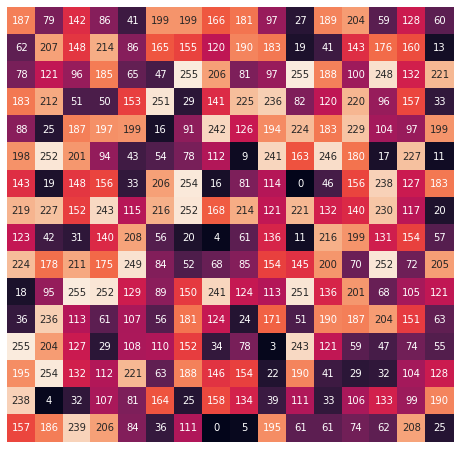

In [15]:
def make_square_tensor2(width=16):
    # TODO: Finish this part
    result = (torch.rand(width, width) * 256).to(torch.uint8)  # This is a placeholder
    return result

test_tensor = make_square_tensor2()

import seaborn as sns
plt.figure(figsize=(8, 8))
sns.heatmap(test_tensor,
            fmt='d',
            annot=True,
            cbar=False,
            xticklabels=False,
            yticklabels=False,
           )

**Reference result**

Your result should look something like the one shown below.

<div>
    <img src="imgs/torch_0_255_heatmap2.png" width="400"/>
</div>

### Checkpoint Assignment

Write a function to compute the [pseudo-inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) of a matrix.
Reminder: the pseudo-inverse is computed as $A^{+} = (A^TA)^{-1}A^T$. Note that $A$ might or might not have an inverse.
If it does, $A^{+}=A^{-1}$ is the "inverse", otherwise $A^{+}$ is the "pseudo-inverse".

*Hints*:
- You can compute the inverse $(A^TA)^{-1}$ using **`torch.inverse()`**;
- If you get an error `RuntimeError: "inverse_cpu" not implemented for`, try converting your matrix to `torch.float` before computing. Before returning, you can again convert it to either `torch.uint8` or `torch.int8`
- If you get an error that the matrix is singular (`singular U`), that means your input matrix is mostly zero (most probably), and your previous solution was off.

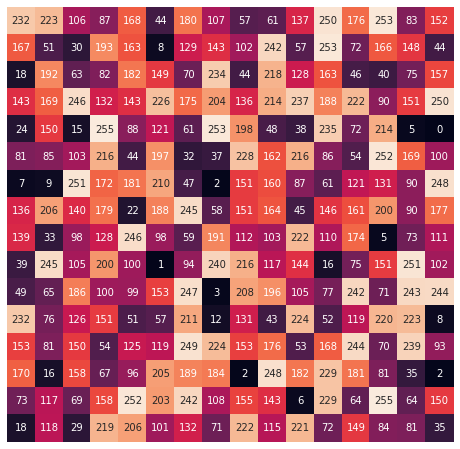

In [16]:
def pseudo_inverse(A):
    assert(A.ndim == 2)  # Work only with matrices
    # TODO: Finish this part
    Ainv = A  # This is a placeholder
    return Ainv

test_tensor_inv = pseudo_inverse(test_tensor)

result = test_tensor.to(torch.float) @ test_tensor_inv.to(torch.float)
result = result.round()
result = result.to(torch.uint8)

import seaborn as sns
plt.figure(figsize=(8, 8))
sns.heatmap(result,
            fmt='d',
            annot=True,
            cbar=False,
            xticklabels=False,
            yticklabels=False,
           )

**Reference result**

Your result should look something like the one shown below.

<div>
    <img src="imgs/torch_0_255_heatmap3.png" width="400"/>
</div>

## Using GPUs

If a GPU is available, it is as easy as just calling either `a.cuda()` or `a.to('cuda')` to send the matrix to the GPU.
In addition to that it is worth mentioning the `torch.cuda.is_available()`, which return `True` if CUDA GPU is available.

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

a = a.to(device)
b = b.to(device)

print(f'>>> a @ b.T\n{a @ b.T}')

RuntimeError: addmm for CUDA tensors only supports floating-point types. Try converting the tensors with .float() at /opt/conda/conda-bld/pytorch_1579022060824/work/aten/src/THC/generic/THCTensorMathBlas.cu:456

There is not much to it -- once you send a tensor to a GPU, most operations will be performed there.
Of course, when you create more complex models, you will have to send the models to the GPU as well, but we will cover it (implicitly) in the later tutorials.